Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
MSE: 31717558996.908363
R² Score: 0.7422016870960992
MAE: 140632.51343115998


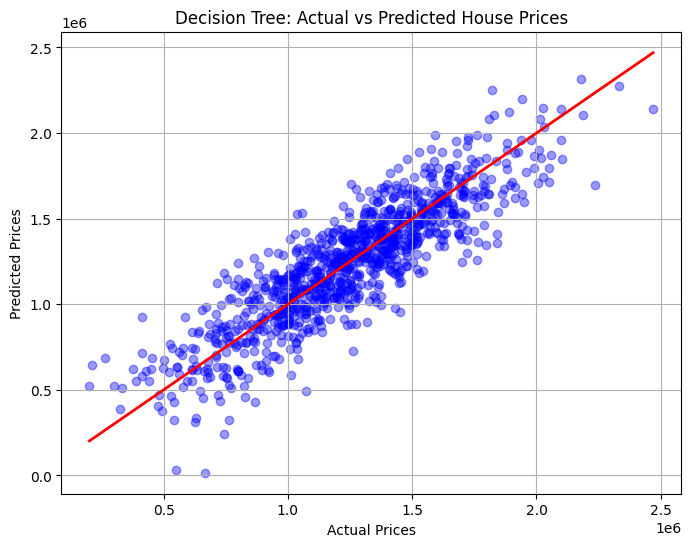

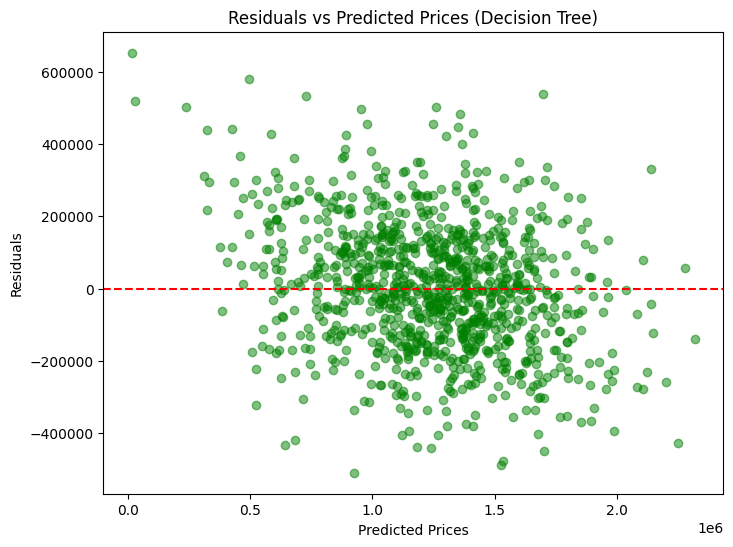

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset
Data = pd.read_csv('housing.xls')

# Handle missing values (if any)
print(Data.isnull().sum())
Data = Data.dropna()

# Define features and target
X = Data[['Avg. Area Income', 'Avg. Area House Age', 
          'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
          'Area Population']]
y = Data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)
print("MAE:", mae)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted House Prices")
plt.grid(True)
plt.savefig("DecisionTree2.jpg")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices (Decision Tree)")
plt.show()


In [2]:
import pickle

# Save the trained Decision Tree model as 'decision_tree_model.pkl'
with open("project-root/model/decision_tree_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Decision Tree model saved as 'decision_tree_model.pkl'")


✅ Decision Tree model saved as 'decision_tree_model.pkl'
